In [1]:
from IPython.display import display, Math, Latex

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Tutorial 4

## Quick Python Lesson

### Slicing with Strings

In [2]:
# You can slice strings too
s = 'apple' 

s[:4]

'appl'

In [3]:
# More slicing
'apple'[2:3]

'p'

In [4]:
'2021-01-01'[5:7]

'01'

### Loops

A loop is used if you want to be repeating a block of code a number of times. This is the same concept as what you would have learned in CS135 or CS115 with Racket. We'll go over the syntax for loops in Python.

#### For Loops
For loops are useful when you know how many times you want the for loop to run.

In [5]:
fruits = ['apple', 'peach', 'grapes']

# For loop
for fruit in fruits:
    print(fruit)

apple
peach
grapes


In [6]:
len(fruits)

3

In [7]:
# For loop with ranges
for i in range(len(fruits)):
    print(fruits[i])

apple
peach
grapes


#### While Loops
While loops are useful when you want to break your loop with a separate case of conditions.

In [8]:
i = 0 
while i < len(fruits):
    print(fruits[i])
    
    if fruits[i] == 'peach':
        break
    i += 1

apple
peach


Note that for the while loop, we have to initialize a counter variable, for example i = 0 and then update it at the end of the loop block. 

## More About DataFrames

In [9]:
# Read in csv
grades = pd.read_csv('grades.csv')

In [10]:
# View the data
grades.head()

,assignment,weight,marks,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,0.1,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.1,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.1,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.1,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.1,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's begin by setting our index to be the assignment numbers.

In [11]:
# Set index to assignment
grades.set_index('assignment', inplace=True)

## Data Cleaning

In [12]:
# Clean up the data 
grades = grades[['weight', 'marks']]

# View data
grades.head()

,weight,marks
assignment,,
1,0.1,93
2,0.1,44
3,0.1,75
4,0.1,78
5,0.1,92


In [13]:
grades

,weight,marks
assignment,,
1,0.1,93
2,0.1,44
3,0.1,75
4,0.1,78
5,0.1,92
6,0.1,90
7,0.1,95
8,0.1,57


Now, we want to determine the final grade of the student using these 10 assignments. First, we check to see if the weighting of these grades adds up to 100 to make sure we aren't missing any data.

## Summing over Rows/Columns

In [14]:
# Summing a column against all the rows (axis=0)
grades.weight.sum(axis=0)

0.8

This is less useful in our scenario here, but if you wanted to sum against all the columns, you would just set axis=1 instead of axis=0. 

In [15]:
# Summing a row against all the columns (axis=1)
grades.sum(axis=1)

assignment
1    93.1
2    44.1
3    75.1
4    78.1
5    92.1
6    90.1
7    95.1
8    57.1
dtype: float64

So we know that we are missing some data here. We happen to know that the remaining data is:
* Assignment 9: 78
* Assignment 10: 83. 

This data is stored in another dataframe called missing_data

## Appending Data

In [16]:
missing_data = pd.DataFrame({'assignment': [9,10],
                             'weight': [0.1, 0.1],
                             'marks': [78, 93]})

# Prepare data to append it to grades
missing_data.set_index('assignment', inplace=True)

missing_data.head()

,weight,marks
assignment,,
9,0.1,78
10,0.1,93


We use `df1.append(df2)` to add our missing data onto the end of our existing dataframe. This creates a new dataframe so we will call this `complete_grades`.

In [17]:
# Append missing data to grades
complete_grades = grades.append(missing_data)

complete_grades

,weight,marks
assignment,,
1,0.1,93
2,0.1,44
3,0.1,75
4,0.1,78
5,0.1,92
6,0.1,90
7,0.1,95
8,0.1,57
9,0.1,78


Since our index was already 9, 10 in the missing_data DataFrame, then we would not ignore the index. 

Next, let's calculate the weighting of each assignment from this student's grades. This would be multiplying the weight of each assignment by the marks and we'll store this in a new column, `mark_weight`.

## Multiplying Columns

In [18]:
# Multiply weight and marks 
complete_grades['mark_weight'] = complete_grades.weight * complete_grades.marks

In [19]:
# View the data
complete_grades.head()

,weight,marks,mark_weight
assignment,,,
1,0.1,93,9.3
2,0.1,44,4.4
3,0.1,75,7.5
4,0.1,78,7.8
5,0.1,92,9.2


Adding, subtracting, multiplying and dividing columns does it element-by-element. 

Now, let's calculate the students final grade from these assignments.

In [20]:
# Calculate final grade
complete_grades.mark_weight.sum(axis=0)

79.5

Now, what if you wanted to see the percent change in your grades over the assignments. There is a quick and easy way to do that! 

## Percentage Changes

In [21]:
# Percentage change between assignments
complete_grades.marks.pct_change()

assignment
1          NaN
2    -0.526882
3     0.704545
4     0.040000
5     0.179487
6    -0.021739
7     0.055556
8    -0.400000
9     0.368421
10    0.192308
Name: marks, dtype: float64

Note that it doesn't count the percentage change for the first assignment because there is no assignment 0 to reference to. We can see that for the most part the assignment grades are improving throughout the term. 

## Filtering

We went through some basic filtering with masks. There are a few other ways to filter your index or columns if they contain strings. For these purposes, we will use another set of data.

Suppose you make a diary of all the fruits you ate from Jan to March 2021. We want to do a quick analysis on these fruits to see what types of fruits you prefer.

In [22]:
# Import the data
fruits = pd.read_csv('fruits.csv')
fruits.set_index('Date', inplace=True)

fruits.head()

,Fruit
Date,
2021-01-01,apple
2021-01-02,banana
2021-01-03,strawberry
2021-01-04,pears
2021-01-05,pineapple


In [23]:
# What is the distribution of fruits
fruits.Fruit.value_counts()

strawberry    15
apple         11
orange        10
kiwi          10
pineapple     10
watermelon     9
grapes         7
banana         7
pears          6
peach          5
Name: Fruit, dtype: int64

Clearly, strawberry is your favorite fruit. What if I wanted to see what fruit I ate the most in February? 

In [24]:
# Filter fruits by February 2021
feb_fruits = fruits.filter(like='2021-02', axis=0)

feb_fruits.head()

,Fruit
Date,
2021-02-01,kiwi
2021-02-02,watermelon
2021-02-03,strawberry
2021-02-04,peach
2021-02-05,kiwi


This essentially checks the index (axis=0) so all rows to see if '2021-02' is in the Dates. This is a quick way to get your data when your index is a string.

What if I wanted to get all the dates where I ate strawberries? 

In [25]:
# Filter for strawberries
fruits[fruits.Fruit == 'strawberry']

,Fruit
Date,
2021-01-03,strawberry
2021-01-14,strawberry
2021-01-22,strawberry
2021-01-29,strawberry
2021-02-03,strawberry
2021-02-07,strawberry
2021-02-12,strawberry
2021-02-16,strawberry
2021-02-18,strawberry


What if I wanted to check for strawberries and apples?

There are two methods you can use, you can do this with a OR in your mask or you can use `df.isin` which takes a list and outputs when the data has values in that list.

In [26]:
# Get the mask to check for apples and strawberries
mask = fruits.Fruit.isin(['apple', 'strawberry'])

# View mask
mask.head()

Date
2021-01-01     True
2021-01-02    False
2021-01-03     True
2021-01-04    False
2021-01-05    False
Name: Fruit, dtype: bool

A mask basically gives you a True or False for each row of your DataFrame depending on if the condition holds true or not.

In [27]:
# All the dates you ate apples or strawberries
fruits[mask]

,Fruit
Date,
2021-01-01,apple
2021-01-03,strawberry
2021-01-14,strawberry
2021-01-15,apple
2021-01-17,apple
2021-01-22,strawberry
2021-01-27,apple
2021-01-29,strawberry
2021-01-30,apple


# Exercises

Exercise 1: Calculate how much of their total grade the student lost in each assignment, i.e. the difference between the weight of the assignment and the weight from their mark.

Exercise 2: Plot their marks over time between the assignments.

Exercise 3: Plot the distribution of the fruits over time

Exercise 4: Get the total number of times you ate strawberries, apples, and pineapples per month. 

**HINT:** You can access the strings of a column by using `df.column_name.str` and then apply the slicing to get the month of each date.

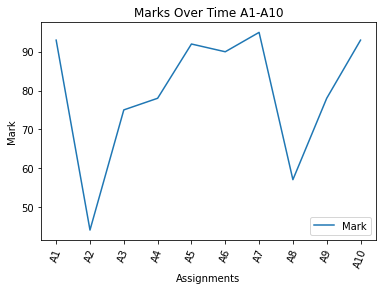

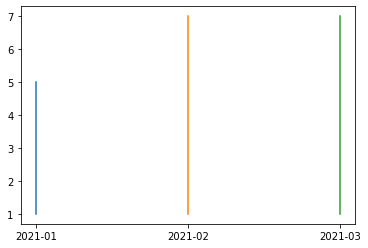

In [42]:
#Question 1
complete_grades['lost_grade'] = 10-complete_grades['mark_weight']
complete_grades.head()

#Question 2
plt.plot(complete_grades.index, complete_grades['marks'],label='Mark')
labels=['A1', 'A2', 'A3', 'A4', 'A5','A6','A7','A8','A9','A10']
plt.title('Marks Over Time A1-A10')
plt.xlabel('Assignments')
# Rotate x-axes by 70 degrees
plt.xticks(complete_grades.index,labels,rotation=70)
plt.ylabel('Mark')
# Create legend
plt.legend(loc='best')

plt.show()

#Question 3
